In [1]:
!pip install tensorflow
from tensorflow import keras

2025-04-29 21:59:18.801747: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745963958.987092      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745963959.035190      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Dense, Flatten, Activation
from keras.losses import categorical_crossentropy
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

In [4]:
num_features = 32
num_labels = 7
batch_size = 64
epochs = 70
width, height = 48, 48

In [5]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1. / 255)
validation_data_gen = ImageDataGenerator(rescale=1. / 255)

# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
    '/kaggle/input/fer2013/train',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical')

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
    '/kaggle/input/fer2013/test',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical')


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
# Build the model
model = Sequential()
model.add(Conv2D(2 * num_features, kernel_size=(3, 3), padding='same', data_format='channels_last',input_shape=(width, height, 1)))
model.add(Conv2D(2 * num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(2 * 2 * num_features, kernel_size=(3, 3), padding='same'))
model.add(Conv2D(2 * 2 * num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(2 * 2 * 2 * num_features, kernel_size=(1, 1), padding='same'))
model.add(Conv2D(2 * 2 * 2 * num_features, kernel_size=(1, 1), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=128))
model.add(BatchNormalization())
model.add(Dense(units=128))
model.add(BatchNormalization())

model.add(Dense(num_labels, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1745964071.582031      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 6, 6, 256)           │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 6, 6, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 673,095 (2.57 MB)

 Trainable params: 671,687 (2.56 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [7]:
# Compiling the model with adam optimizer and categorical crossentropy loss
model.compile(loss=categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

In [8]:
# Train the neural network/model
emotion_model_info = model.fit(
    train_generator,
    steps_per_epoch=32114 // 64,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=6423 // 64,
    # callbacks=[es]
)

Epoch 1/70


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1745964105.399429     111 service.cc:148] XLA service 0x7fc908003d00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745964105.400125     111 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1745964105.990108     111 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/501 ━━━━━━━━━━━━━━━━━━━━ 1:42:44 12s/step - accuracy: 0.1250 - loss: 2.7590

I0000 00:00:1745964110.210074     111 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


446/501 ━━━━━━━━━━━━━━━━━━━━ 11s 216ms/step - accuracy: 0.3431 - loss: 1.7418

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


501/501 ━━━━━━━━━━━━━━━━━━━━ 131s 237ms/step - accuracy: 0.3498 - loss: 1.7214 - val_accuracy: 0.3988 - val_loss: 1.5681
Epoch 2/70
501/501 ━━━━━━━━━━━━━━━━━━━━ 26s 51ms/step - accuracy: 0.5038 - loss: 1.3146 - val_accuracy: 0.4846 - val_loss: 1.3196
Epoch 3/70
501/501 ━━━━━━━━━━━━━━━━━━━━ 33s 66ms/step - accuracy: 0.5470 - loss: 1.2038 - val_accuracy: 0.4958 - val_loss: 1.3158
Epoch 4/70
501/501 ━━━━━━━━━━━━━━━━━━━━ 24s 47ms/step - accuracy: 0.5731 - loss: 1.1490 - val_accuracy: 0.4589 - val_loss: 1.5872
Epoch 5/70
501/501 ━━━━━━━━━━━━━━━━━━━━ 32s 64ms/step - accuracy: 0.5961 - loss: 1.0788 - val_accuracy: 0.4995 - val_loss: 1.3401
Epoch 6/70
501/501 ━━━━━━━━━━━━━━━━━━━━ 25s 49ms/step - accuracy: 0.6197 - loss: 1.0264 - val_accuracy: 0.4846 - val_loss: 1.3739
Epoch 7/70
501/501 ━━━━━━━━━━━━━━━━━━━━ 32s 64ms/step - accuracy: 0.6402 - loss: 0.9646 - val_accuracy: 0.4731 - val_loss: 1.4720
Epoch 8/70
501/501 ━━━━━━━━━━━━━━━━━━━━ 28s 54ms/step - accuracy: 0.6635 - loss: 0.9179 - val_accur

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


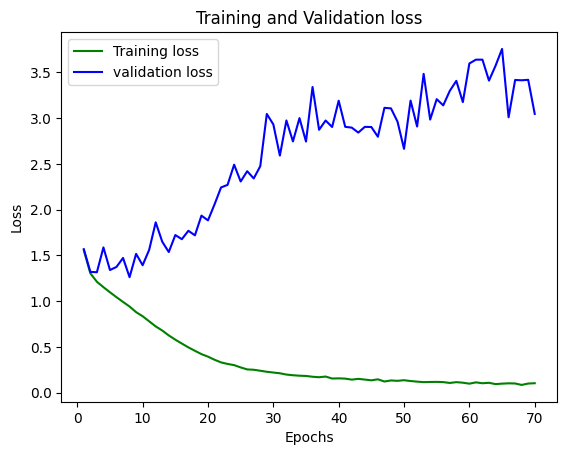

In [9]:
# The below snippet plots the graph of the training loss vs. validation loss over the number of epochs.
# This will help the developer of the model to make informed decisions
# about the architectural choices that need to be made
# -----------------------------------------------------------------------
print(emotion_model_info.history.keys())

loss_train = emotion_model_info.history['loss']
loss_val = emotion_model_info.history['val_loss']
epochs = range(1, 71)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# ------------------------------------------------------------------------

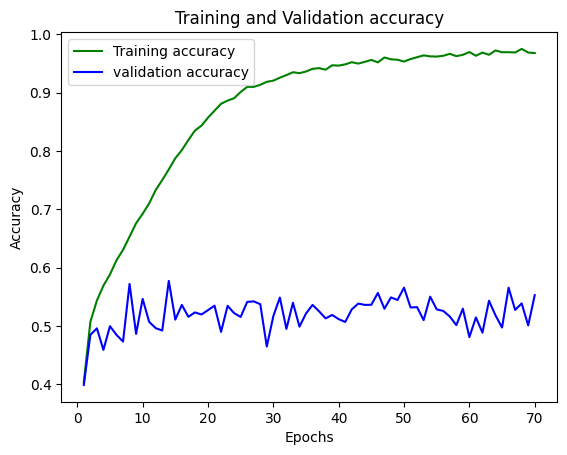

In [10]:
# The following snippet plots the graph of training accuracy vs. validation accuracy over the number of epochs.
# ------------------------------------------------------------------------

loss_train = emotion_model_info.history['accuracy']
loss_val = emotion_model_info.history['val_accuracy']
epochs = range(1, 71)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# ------------------------------------------------------------------------


In [12]:
# saving the  model to be used later
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    model.save_weights("model.weights.h5")
print("Saved model to disk")

Saved model to disk


In [14]:
!zip -r /kaggle/working/working_dir_backup.zip /kaggle/working/

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/model.json (deflated 93%)
  adding: kaggle/working/model.weights.h5 (deflated 8%)
  adding: kaggle/working/.virtual_documents/ (stored 0%)
